In [162]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBRegressor

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [129]:
#Create an ml model that predicts whether a given email is spam or ham

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [130]:
#Recieved and data from text folder and converted to csv file
# path = "Emails"
# outputCSV = "Output.csv"
# data = []

# csvHeader = ['Filename', 'Content', 'IsSpam']

# for filename in os.listdir(path):
#     if filename.endswith(".txt"):
#         filepath = os.path.join(path, filename)
#         with open(filepath, 'r', encoding='utf-8') as f:
#             content = f.read()
#         if filename.startswith('s'):
#             is_spam = 1
#         else:
#             is_spam = 0
#         data.append([filename, content, is_spam])

# with open(outputCSV, 'w', newline='', encoding='utf-8') as csvfile:
#     csv_writer = csv.writer(csvfile)
#     csv_writer.writerow(csvHeader)
#     csv_writer.writerows(data)
 

#Recieved and read the data from the csv file using pandas
data = pd.read_csv("Output.csv")
data.head()

,Filename,Content,IsSpam
0,6-14msg3.txt,Subject: wkshp : * early * - e ( = ) uralic in...,0
1,6-110msg1.txt,Subject: job announcement - academium sinica\n...,0
2,9-63msg1.txt,Subject: knowledge language bibliography\n\nas...,0
3,spmsga95.txt,Subject: service update\n\ndue significant rap...,1
4,6-97msg1.txt,Subject: job announcement\n\njob announcement ...,0


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

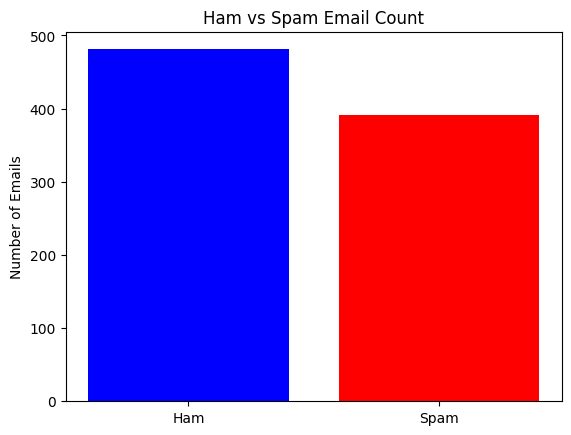

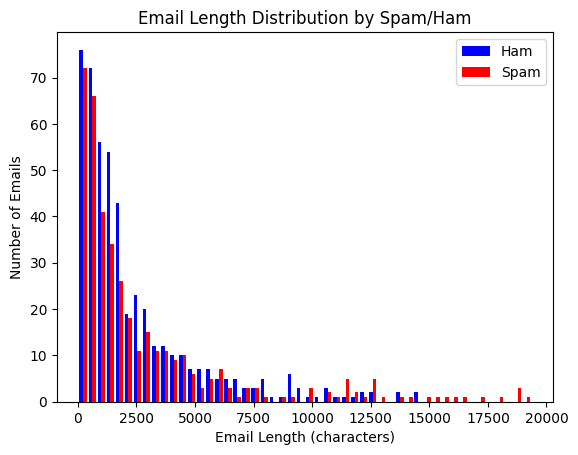

In [125]:
#Checking ham and spam counts
counts = data['IsSpam'].value_counts()  
plt.bar(['Ham', 'Spam'], counts, color=['blue', 'red'])
plt.ylabel('Number of Emails')
plt.title('Ham vs Spam Email Count')
plt.show()

#Checking lengths of emails
lengths_ham = data[data['IsSpam']==0]['Content'].str.len()
lengths_spam = data[data['IsSpam']==1]['Content'].str.len()

plt.hist([lengths_ham, lengths_spam], bins=50, label=['Ham','Spam'], color=['blue','red'])
plt.xlabel('Email Length (characters)')
plt.ylabel('Number of Emails')
plt.title('Email Length Distribution by Spam/Ham')
plt.legend()
plt.show()

#There are more ham emails than spam emails and the spam emails are longer

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [147]:
#Converts the data to variables for training
x = data['Content']
y = data.loc[x.index, 'IsSpam']

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [158]:
#Splits the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [170]:
#Trying different models to find the best model to predict ham or spam
NBmodel = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb', MultinomialNB())
])

NBmodel.fit(x_train, y_train)
NBaccuracy = NBmodel.score(x_test, y_test)
print("MultinomialNB Accuracy", NBaccuracy)

MultinomialNB Accuracy 0.9828571428571429


In [160]:
BNBmodel = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('bnb',  BernoulliNB())
])

BNBmodel.fit(x_train,y_train)
BNBaccuracy = BNBmodel.score(x_test,y_test)
print("Bernouli Accuracy", BNBaccuracy)

Bernouli Accuracy 0.9485714285714286


In [163]:
xgbModel = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('xgb',  XGBRegressor())
])
xgbModel.fit(x_train, y_train)
xgbAccuracy = xgbModel.score(x_test, y_test)
print("XGB Accuracy", xgbAccuracy)

XGB Accuracy 0.7960630655288696


In [173]:
svmModel = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('svm',  SVC())
])
svmModel.fit(x_train, y_train)
svmAccuracy = svmModel.score(x_test, y_test)
print("SVM Accuracy", svmAccuracy)

SVM Accuracy 0.8914285714285715


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best results possiable 


In [187]:
NBmodel = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb', Multinomai(alpha = 1))
])

NBmodel.fit(x_train, y_train)
NBaccuracy = NBmodel.score(x_test, y_test)
print("MultinomialNB Accuracy", NBaccuracy)

#Tried changing the different alpha values but the highest accuracy was still 98.2%

#Saves the model
joblib.dump(NBmodel, "NBmodel.joblib")
print("Model Saved")

NameError: name 'MultinomitalNB' is not defined

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken
